# Double Descent with Synthetic Sinusoidal Data


## Plotting Sin Dataset

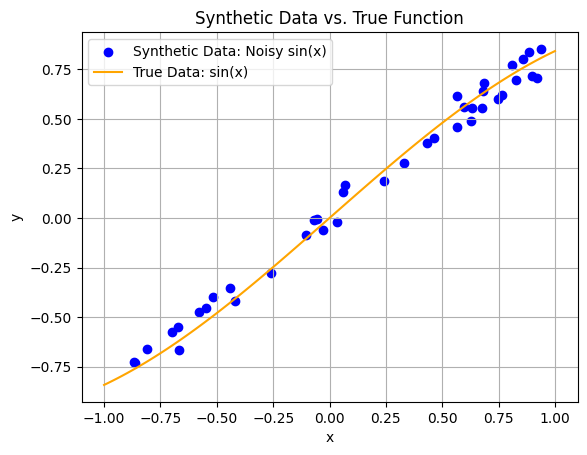

In [ ]:
#Recreate Data Descent with synthetic data (sinusoidal function with noise) and real-life data (daily temperatures)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# generate synthetic data set
samples = 40

X_train_sine = []
Y_train_sine = []


for i in range(samples):
  x_val = np.random.uniform(-1,1)   # random x in (0, 10)
  noise = np.random.uniform(-0.1,0.1) # noise added to y (epsilon)
  y_val = np.sin(x_val) + noise     # noisy value

  X_train_sine.append(x_val)
  Y_train_sine.append(y_val)

# convert to numpy arrays and reshape -- we want column vectors
X_train_sine = np.array(X_train_sine).reshape(-1, 1)  # shape = (samples, 1)
Y_train_sine = np.array(Y_train_sine).ravel()   # shape = (samples, 1)

#print(X_train_sine)
#print(Y_train_sine)

# I am going to create the sine function to compare with our synthetic data
# plot true function and samples + reshape -- again we want column vectors
X_true = np.linspace(-1,1,100).reshape(-1, 1)
Y_true = np.sin(X_true)

# plot synthetic data against true data
plt.scatter(X_train_sine,Y_train_sine, marker = 'o', color = "blue", label = "Synthetic Data: Noisy sin(x)")
plt.plot(X_true, Y_true, color = "orange", label = "True Data: sin(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Data vs. True Function")
plt.grid(True)
plt.show()


## Double Descent in Polynomial Regression with Sin Data


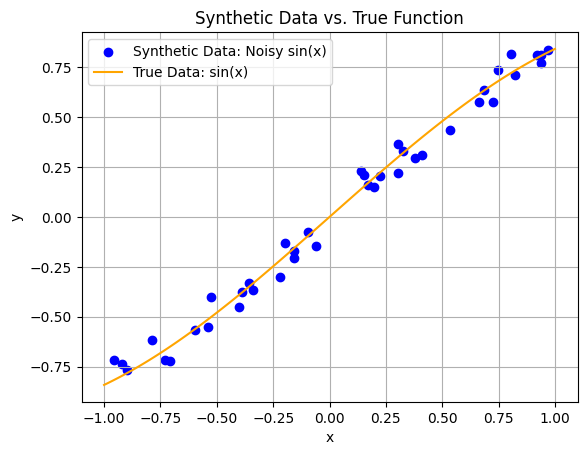

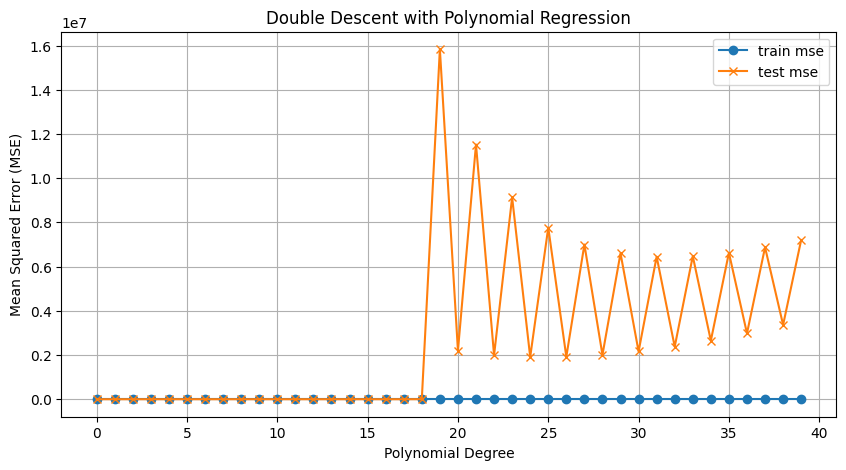

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# generate synthetic data set
samples = 40

X_train_sine = []
Y_train_sine = []


for i in range(samples):
  x_val = np.random.uniform(-1,1)   # random x in (0, 10)
  noise = np.random.uniform(-0.1,0.1) # noise added to y (epsilon)
  y_val = np.sin(x_val) + noise     # noisy value

  X_train_sine.append(x_val)
  Y_train_sine.append(y_val)

# convert to numpy arrays and reshape -- we want column vectors
X_train_sine = np.array(X_train_sine).reshape(-1, 1)  # shape = (samples, 1)
Y_train_sine = np.array(Y_train_sine).ravel()   # shape = (samples, 1)

#print(X_train_sine)
#print(Y_train_sine)

# I am going to create the sine function to compare with our synthetic data
# plot true function and samples + reshape -- again we want column vectors
X_true = np.linspace(-1,1,100).reshape(-1, 1)
Y_true = np.sin(X_true)

# plot synthetic data against true data
plt.scatter(X_train_sine,Y_train_sine, marker = 'o', color = "blue", label = "Synthetic Data: Noisy sin(x)")
plt.plot(X_true, Y_true, color = "orange", label = "True Data: sin(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Data vs. True Function")
plt.grid(True)
plt.show()
# part 3: recreate double descent

# split synthetic data iinto training and testing sets
# we randomly select 70% of X_train_sine vals and corresponding Y_train_sine vals for test set (the remaining 30% go into the train set)
# random_state: we use a fixed val for random seed for reproducibility -- we want the same train/test split for each run

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# plot synthetic data against true data
#plt.scatter(X_train_sine,Y_train_sine, marker = 'o', color = "blue", label = "Synthetic Data: noisy sin(x)")
#plt.plot(X_true, Y_true, color = "orange", label = "True Data: sin(x)")
#plt.legend()
#plt.xlabel("x")
#plt.ylabel("y")
#plt.title("Synthetic Data vs. True Function")
#plt.grid(True)
#plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X_train_sine, Y_train_sine, test_size = 0.5, random_state=1)

# set degrees M of the polynomials we're testing -- we'll test M in (0, 35)
degrees = list(range(0, 40))

# generate lists to store MSE for each degree
train_errors = []
test_errors = []

# loop over each degree
for d in degrees:
  # generate polynomial features
  poly = PolynomialFeatures(degree = d)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  # fit the linear regression model to the features
  model = LinearRegression()
  model.fit(X_train_poly, Y_train)

  # predict on train/test data
  Y_train_pred = model.predict(X_train_poly)
  Y_test_pred = model.predict(X_test_poly)

  # compute MSE for train/test predictions
  train_mse = mean_squared_error(Y_train, Y_train_pred)
  test_mse = mean_squared_error(Y_test, Y_test_pred)

  # store errors
  train_errors.append(train_mse)
  test_errors.append(test_mse)

# plot train/test error
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, marker = 'o', label = "train mse")
plt.plot(degrees, test_errors, marker = 'x', label = "test mse")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Double Descent with Polynomial Regression")
plt.legend()
plt.grid(True)
#plt.yscale("log")
plt.show()




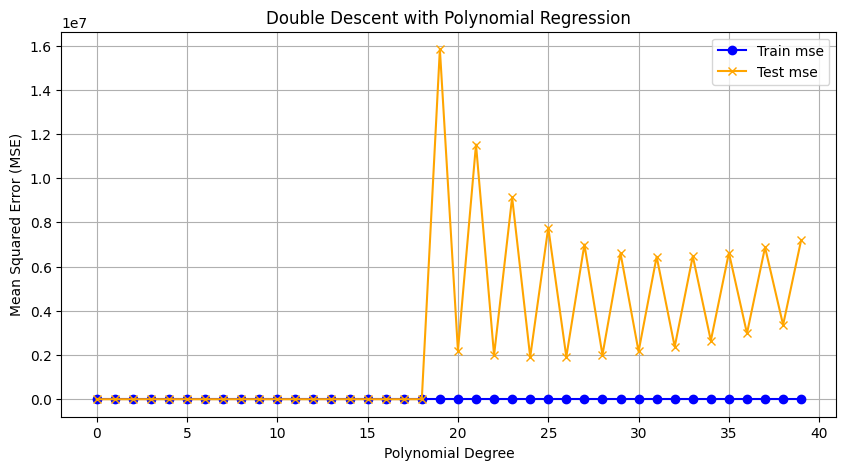

In [ ]:
# plot train/test error
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, marker = 'o', color = "blue", label = "Train mse")
plt.plot(degrees, test_errors, marker = 'x', color = "orange",label = "Test mse")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Double Descent with Polynomial Regression")
plt.legend()
plt.grid(True)
#plt.yscale("log")
plt.show()

## Solution Curve Plots for Sin Data


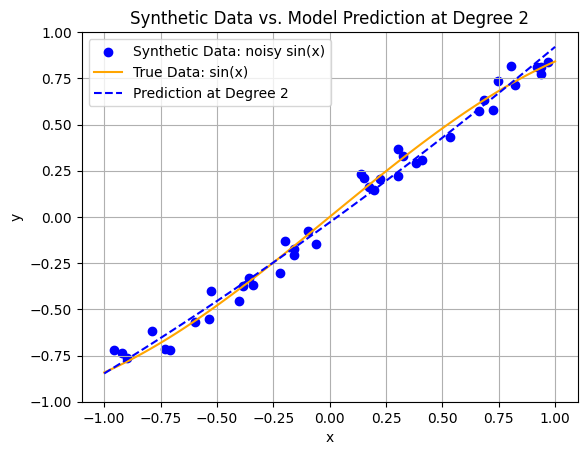

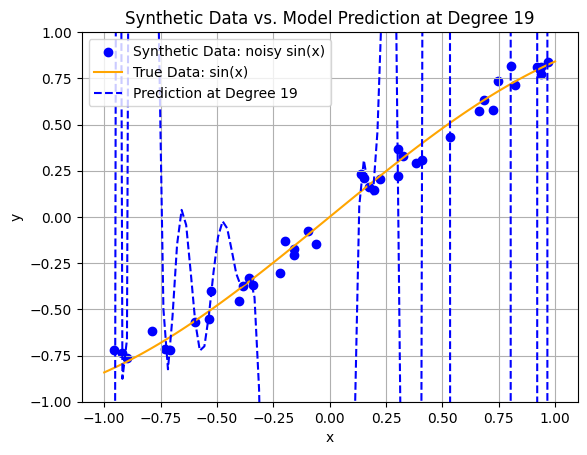

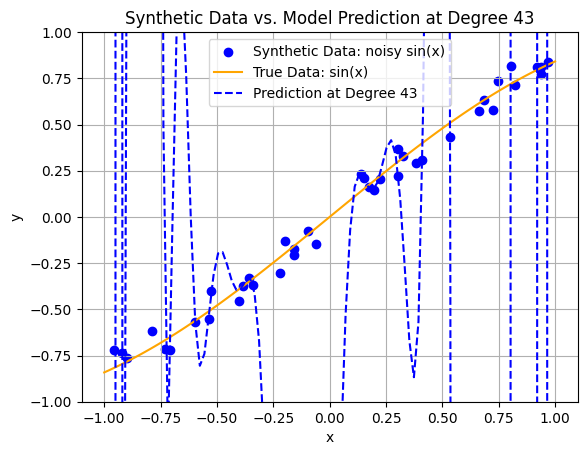

In [ ]:
# Solution Curves
# set degrees M of the polynomials we're testing -- we'll test M in (0, 35)
degrees = list(range(0, 44))

# generate lists to store MSE for each degree
train_errors = []
test_errors = []

# loop over each degree
for d in degrees:
  # generate polynomial features
  poly = PolynomialFeatures(degree = d)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  # fit the linear regression model to the features
  model = LinearRegression()
  model.fit(X_train_poly, Y_train)

  # predict on train/test data
  Y_train_pred = model.predict(X_train_poly)
  Y_test_pred = model.predict(X_test_poly)

  # compute MSE for train/test predictions
  train_mse = mean_squared_error(Y_train, Y_train_pred)
  test_mse = mean_squared_error(Y_test, Y_test_pred)

  # store errors
  train_errors.append(train_mse)
  test_errors.append(test_mse)

  if d in [2,19,43]:
    X_true_poly = poly.transform(X_true)
    Y_pred_trueX = model.predict(X_true_poly)

    plt.scatter(X_train_sine,Y_train_sine, marker = 'o', color = "blue", label = "Synthetic Data: noisy sin(x)")
    plt.plot(X_true, Y_true, color = "orange", label = "True Data: sin(x)")
    plt.plot(X_true, Y_pred_trueX, color = "blue", linestyle = "--", label = f"Prediction at Degree {d}")
    plt.legend()
    plt.ylim(-1,1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Synthetic Data vs. Model Prediction at Degree {d}")
    plt.grid(True)
    plt.show()

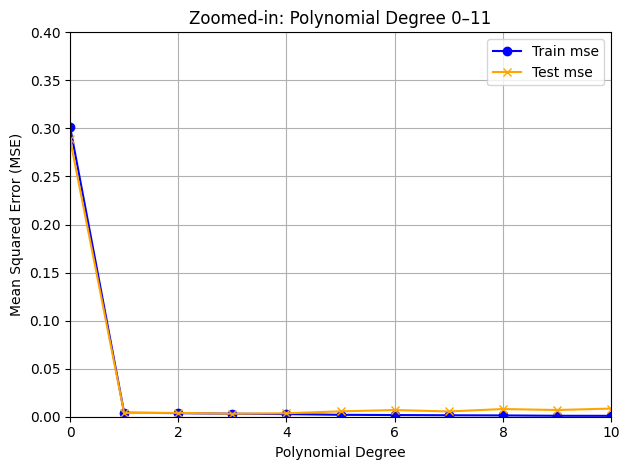

In [ ]:
# Zoom Plot
# Slice the first 11 entries (for degrees 0 through 10)
plt.plot(degrees[0:11], train_errors[0:11], marker='o', label='Train mse', color='blue')
plt.plot(degrees[0:11], test_errors[0:11], marker='x', label='Test mse', color='orange')

plt.ylim(0, 0.4)  # Adjust as needed once you see values
plt.xlim(0, 10)
plt.title("Zoomed-in: Polynomial Degree 0–11")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Ridge Regression on Sin Data


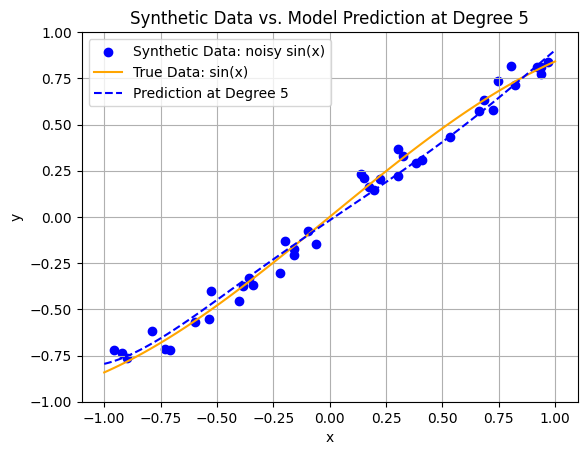

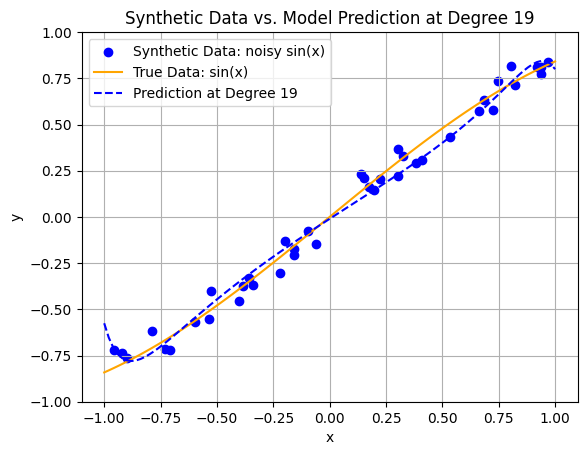

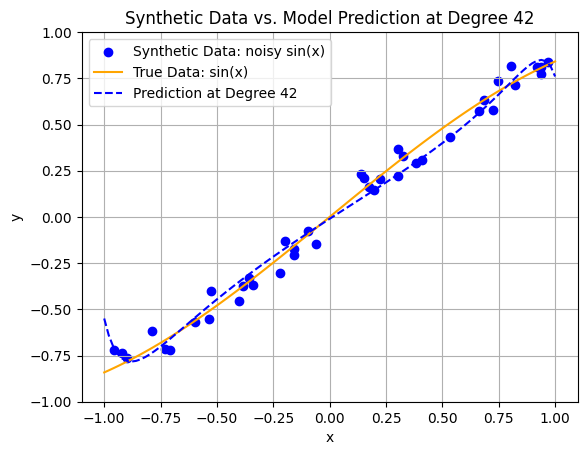

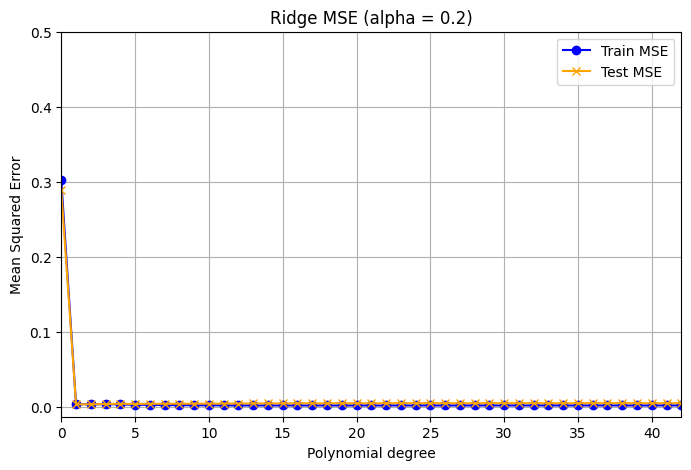

In [ ]:
# Ridge
# generate lists to store MSE for each degree
train_errors_ridge = []
test_errors_ridge = []

# loop over each degree
for d in degrees:

  # generate polynomial features
  poly = PolynomialFeatures(degree = d)

  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  # Ridge model
  model = Ridge(alpha = 0.2)
  model.fit(X_train_poly, Y_train.ravel())

  # predict on train/test data
  Y_train_pred = model.predict(X_train_poly)
  Y_test_pred = model.predict(X_test_poly)

  # compute MSE for train/test predictions
  train_mse_ridge = mean_squared_error(Y_train, Y_train_pred)
  test_mse_ridge = mean_squared_error(Y_test, Y_test_pred)

  # store errors
  train_errors_ridge.append(train_mse_ridge)
  test_errors_ridge.append(test_mse_ridge)

  # solution plots
  if d in [5,19,42]:
    X_true_poly = poly.transform(X_true)
    Y_pred_trueX = model.predict(X_true_poly)

    plt.scatter(X_train_sine,Y_train_sine, marker = 'o', color = "blue", label = "Synthetic Data: noisy sin(x)")
    plt.plot(X_true, Y_true, color = "orange", label = "True Data: sin(x)")
    plt.plot(X_true, Y_pred_trueX, color = "blue", linestyle = "--", label = f"Prediction at Degree {d}")
    plt.legend()
    plt.ylim(-1,1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Synthetic Data vs. Model Prediction at Degree {d}")
    plt.grid(True)
    plt.show()

# plot train/test error
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors_ridge, marker = 'o', label = "Train MSE", color = 'blue')
plt.plot(degrees, test_errors_ridge, marker = 'x', label = "Test MSE", color = "orange")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean Squared Error")
plt.title("Ridge MSE (alpha = 0.2)")
plt.legend()
plt.grid(True)
#plt.yscale("log")
plt.ylim(top = 0.5)
plt.xlim(right = 42, left = 0)
plt.show()




## Lasso Regression on Sin Data


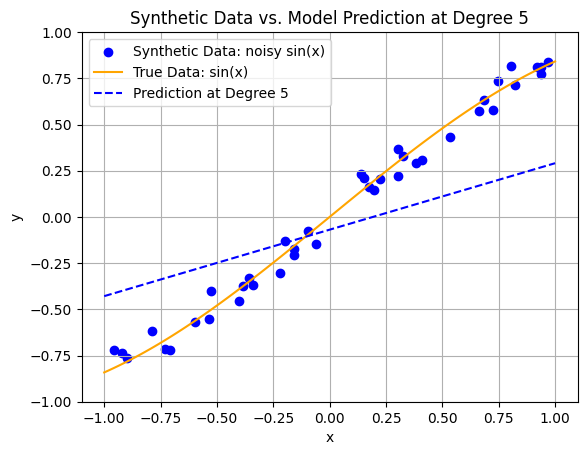

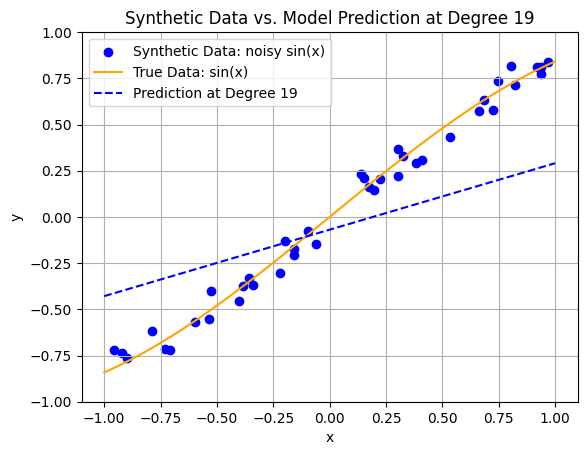

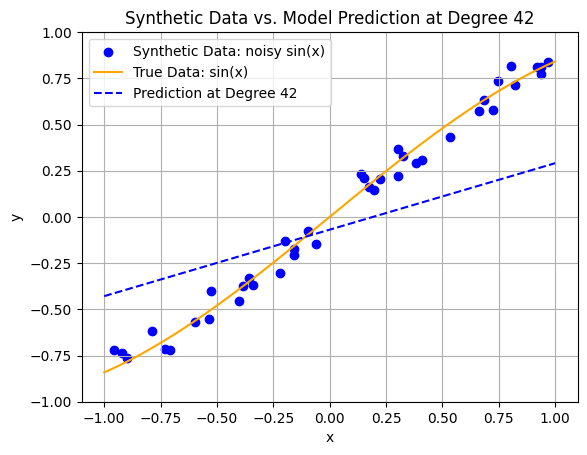

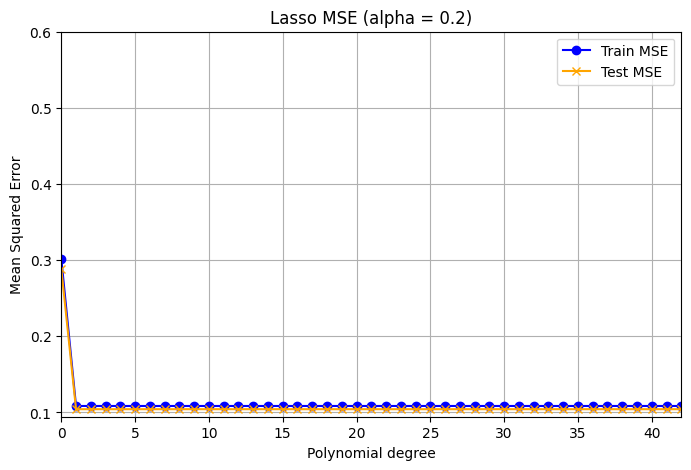

In [ ]:
# Lasso

# generate lists to store MSE for each degree
train_errors_lasso = []
test_errors_lasso = []

# loop over each degree
for d in degrees:

  # generate polynomial features
  poly = PolynomialFeatures(degree = d)

  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  # Lasso model
  model = Lasso(alpha = 0.2)
  model.fit(X_train_poly, Y_train.ravel())

  # predict on train/test data
  Y_train_pred = model.predict(X_train_poly)
  Y_test_pred = model.predict(X_test_poly)

  # compute MSE for train/test predictions
  train_mse_lasso = mean_squared_error(Y_train, Y_train_pred)
  test_mse_lasso = mean_squared_error(Y_test, Y_test_pred)

  # store errors
  train_errors_lasso.append(train_mse_lasso)
  test_errors_lasso.append(test_mse_lasso)

  # solution plots
  if d in [5,19,42]:
    X_true_poly = poly.transform(X_true)
    Y_pred_trueX = model.predict(X_true_poly)

    plt.scatter(X_train_sine,Y_train_sine, marker = 'o', color = "blue", label = "Synthetic Data: noisy sin(x)")
    plt.plot(X_true, Y_true, color = "orange", label = "True Data: sin(x)")
    plt.plot(X_true, Y_pred_trueX, color = "blue", linestyle = "--", label = f"Prediction at Degree {d}")
    plt.legend()
    plt.ylim(-1,1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Synthetic Data vs. Model Prediction at Degree {d}")
    plt.grid(True)
    plt.show()

# plot train/test error
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors_lasso, marker = 'o', label = "Train MSE", color = "blue")
plt.plot(degrees, test_errors_lasso, marker = 'x', label = "Test MSE", color = "orange")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean Squared Error")
plt.title("Lasso MSE (alpha = 0.2)")
plt.legend()
plt.grid(True)
#plt.yscale("log")
plt.ylim(top = 0.6)
plt.xlim(right= 42, left = 0)
plt.show()


['.config', 'weather.csv', 'sample_data']


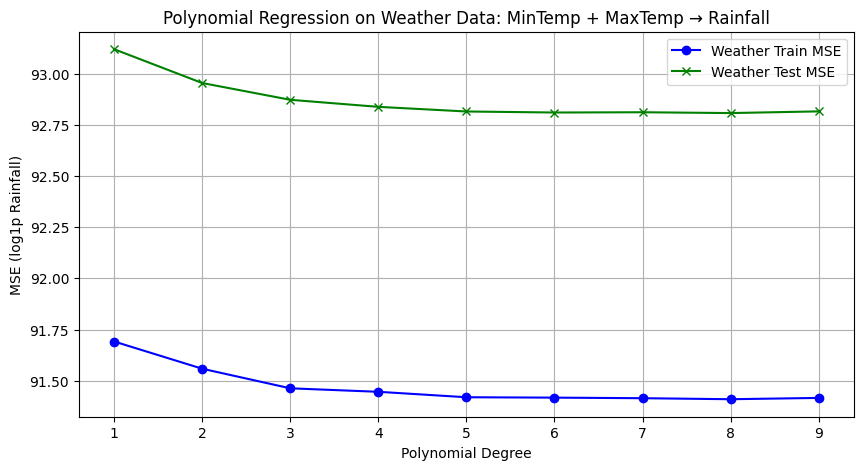

In [ ]:
# Weather data

# we may need more extensive data for this -- double descent usually observed in larger datasets, also need more data to train model in general

import pandas as pd
import os

print(os.listdir())
weather_df = pd.read_csv("/content/weather.csv")
weather_df = weather_df.dropna(subset=["Rainfall", "MaxTemp"])

# set up input features and target variable
X_weather = weather_df["MaxTemp"].values.reshape(-1, 1)# select max
y_weather = weather_df["Rainfall"].values.reshape(-1)

# apply log transform to handle skew and stabilize variance in rainfall
#y_weather = np.log1p(y_weather)  # log(1 + Rainfall)

# train/test split
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_weather, y_weather, test_size=0.2, random_state=42)

# loop through polynomial degrees and compute MSE
weather_degrees = list(range(1, 10))
train_errors_w = []
test_errors_w = []

for d in weather_degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly_w = poly.fit_transform(X_train_w)
    X_test_poly_w = poly.transform(X_test_w)

    model = LinearRegression()
    model.fit(X_train_poly_w, y_train_w)

    y_train_pred_w = model.predict(X_train_poly_w)
    y_test_pred_w = model.predict(X_test_poly_w)

    train_errors_w.append(mean_squared_error(y_train_w, y_train_pred_w))
    test_errors_w.append(mean_squared_error(y_test_w, y_test_pred_w))


# plot
plt.figure(figsize=(10, 5))
plt.plot(weather_degrees, train_errors_w, label="Weather Train MSE", marker='o', color='blue')
plt.plot(weather_degrees, test_errors_w, label="Weather Test MSE", marker='x', color='green')
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE (log1p Rainfall)")
plt.title("Polynomial Regression on Weather Data: MinTemp + MaxTemp → Rainfall")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Sample size = 100: Interpolation degree = None


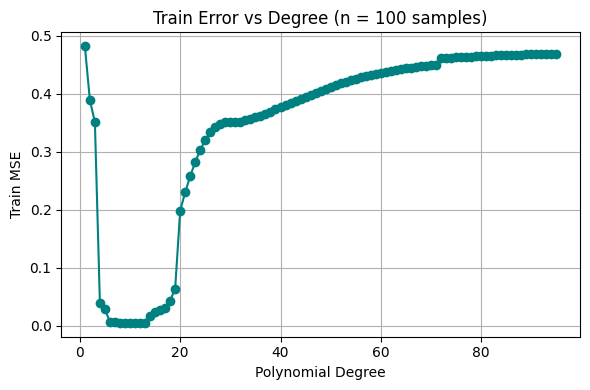

Sample size = 1000: Interpolation degree = None


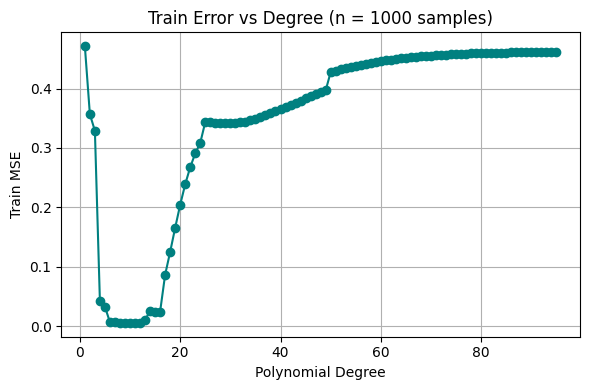

Sample size = 10000: Interpolation degree = None


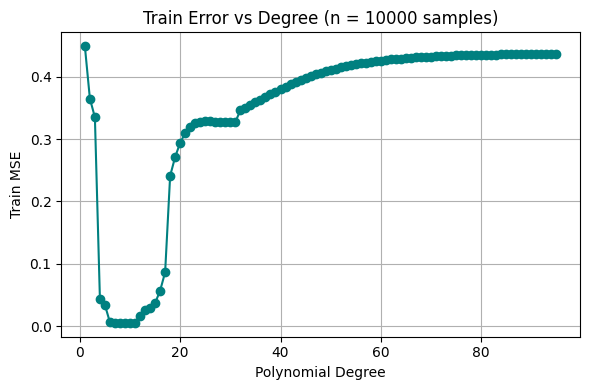

In [ ]:
# Interpolation Thresholds

# sample sizes and degree range
sample_sizes = [100, 1000, 10000]
max_degree = 95
threshold = 1e-10

# loop through each sample size
for n in sample_sizes:
    # Generate synthetic data
    X = np.random.uniform(0, 10, n).reshape(-1, 1)
    noise = np.random.uniform(0, 0.25, n).reshape(-1, 1)
    Y = np.sin(X) + noise

    # track training error
    train_errors = []
    degrees = range(1, max_degree + 1)
    interp_degree = None

    for d in degrees:
        poly = PolynomialFeatures(degree=d)
        X_poly = poly.fit_transform(X)

        model = LinearRegression()
        model.fit(X_poly, Y.ravel())
        Y_pred = model.predict(X_poly)
        mse = mean_squared_error(Y, Y_pred)
        train_errors.append(mse)

        if mse < threshold and interp_degree is None:
            interp_degree = d

    # print interpolation degree for each sample size
    print(f"Sample size = {n}: Interpolation degree = {interp_degree}")

    # plot for eachy sample size
    plt.figure(figsize=(6, 4))
    plt.plot(degrees, train_errors, marker='o', color='teal')
    plt.title(f"Train Error vs Degree (n = {n} samples)")
    plt.xlabel("Polynomial Degree")
    plt.ylabel("Train MSE")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



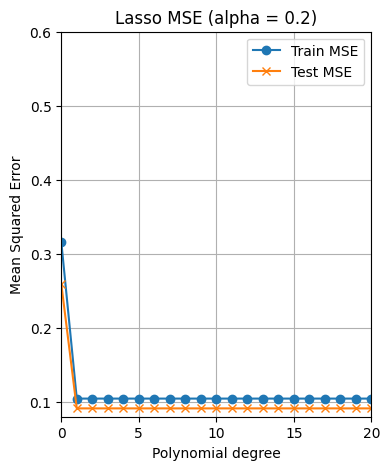

In [ ]:
# Check Lasso
# generate synthetic data set
samples = 40

X_train_sine = []
Y_train_sine = []


for i in range(samples):
  x_val = np.random.uniform(-1,1)   # random x in (0, 10)
  noise = np.random.uniform(-0.1,0.1) # noise added to y (epsilon)
  y_val = np.sin(x_val) + noise     # noisy value

  X_train_sine.append(x_val)
  Y_train_sine.append(y_val)

# convert to numpy arrays and reshape -- we want column vectors
X_train_sine = np.array(X_train_sine).reshape(-1, 1)  # shape = (samples, 1)
Y_train_sine = np.array(Y_train_sine).reshape(-1, 1)  # shape = (samples, 1)


X_train, X_test, Y_train, Y_test = train_test_split(X_train_sine, Y_train_sine, test_size = 0.5, random_state=1)

# set degrees M of the polynomials we're testing -- we'll test M in (0, 35)
degrees = list(range(0, 40))


# generate lists to store MSE for each degree
train_errors_lasso = []
test_errors_lasso = []

# loop over each degree
for d in degrees:

  # generate polynomial features
  poly = PolynomialFeatures(degree = d)

  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  # Ridge model
  model = Lasso(alpha = 0.2)
  model.fit(X_train_poly, Y_train.ravel())

  # predict on train/test data
  Y_train_pred = model.predict(X_train_poly)
  Y_test_pred = model.predict(X_test_poly)

  # compute MSE for train/test predictions
  train_mse_lasso = mean_squared_error(Y_train, Y_train_pred)
  test_mse_lasso = mean_squared_error(Y_test, Y_test_pred)

  # store errors
  train_errors_lasso.append(train_mse_lasso)
  test_errors_lasso.append(test_mse_lasso)

# plot train/test error
plt.figure(figsize=(4, 5))
plt.plot(degrees, train_errors_lasso, marker = 'o', label = "Train MSE")
plt.plot(degrees, test_errors_lasso, marker = 'x', label = "Test MSE")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean Squared Error")
plt.title("Lasso MSE (alpha = 0.2)")
plt.legend()
plt.grid(True)
#plt.yscale("log")
plt.ylim(top = 0.6)
plt.xlim(right = 20, left = 0)
plt.show()





# Weather Data

## Process Data

In [ ]:
import pandas as pd

# read data and process date column
df = pd.read_csv("/weather 2.csv")
df['Date'] = pd.to_datetime(df['Date'])

# extract max temps for albury in yr 2016
weather = np.array(df[(df['Date'].dt.year == 2016) & (df["Location"] == "Albury")]["MaxTemp"]).reshape(-1,1) # 1 year's worth of max temps in celsisus
x = np.arange(1, len(weather) + 1).reshape(-1, 1) / 30 # x measures how many months have passed (0-12) for the year

# subset data
weather = np.array([weather[i] for i in range(len(weather)) if i % 7 == 0]) # use every 7 days for fewer data pts
x = np.array([x[i] for i in range(len(x)) if i % 7 == 0]) # use every 7 days for fewer data pts

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(x, weather, test_size = 0.2, random_state=1)

# store lowest test mse sols per loss fn
best_solutions = []




## Double Descent For OLS, Lasso, Ridge

### OLS

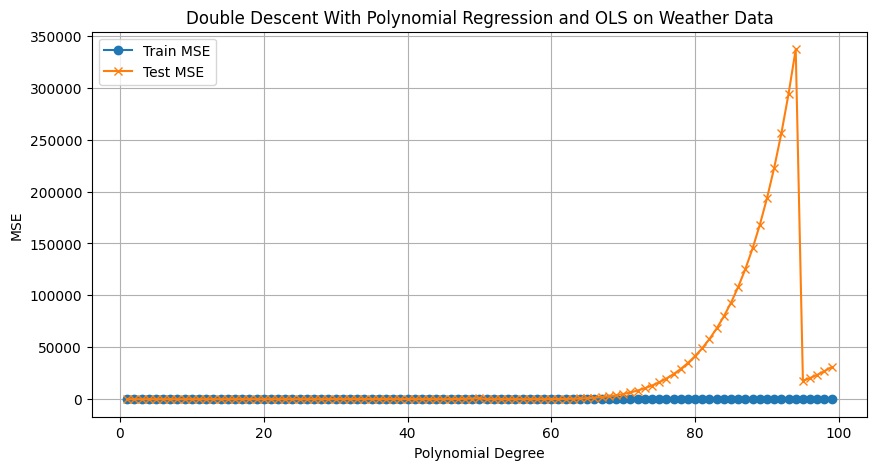

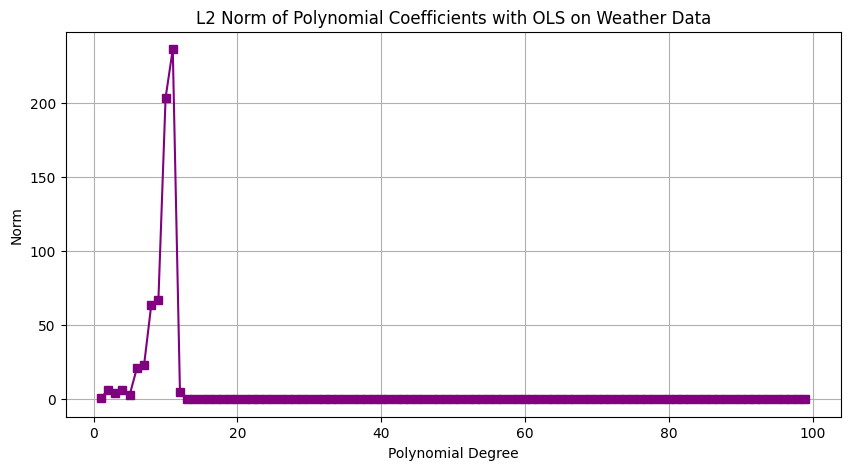

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

degrees = list(range(1, 100))  # under and overparameterized region for 50 data pts selected

train_errors = []
test_errors = []
coef_norms = []

for d in degrees:
    # make phi matrices
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # fit model and make predictions
    model = LinearRegression()
    model.fit(X_train_poly, Y_train.ravel())

    Y_train_pred = model.predict(X_train_poly)
    Y_test_pred = model.predict(X_test_poly)

    # find mse
    train_errors.append(mean_squared_error(Y_train, Y_train_pred))
    test_errors.append(mean_squared_error(Y_test, Y_test_pred))

    # find norm of solution curve
    coef_norm = np.linalg.norm(model.coef_)
    coef_norms.append(coef_norm)

# Plot double descent
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, marker='o', label='Train MSE')
plt.plot(degrees, test_errors, marker='x', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title("Double Descent With Polynomial Regression and OLS on Weather Data")
plt.legend()
plt.grid(True)
plt.show()

# Plot norm of solution curves per number of parameters
plt.figure(figsize=(10, 5))
plt.plot(degrees, coef_norms, marker='s', color='purple')
plt.xlabel('Polynomial Degree')
plt.ylabel('Norm')
plt.title('L2 Norm of Polynomial Coefficients with OLS on Weather Data')
plt.grid(True)
plt.show()


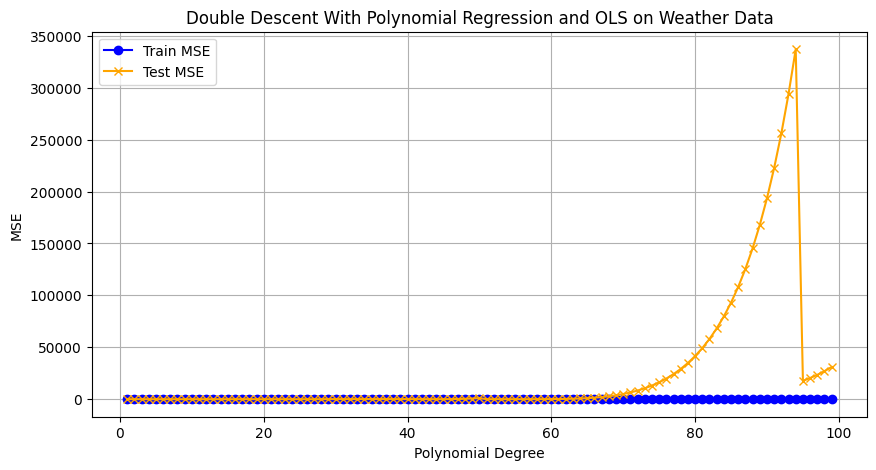

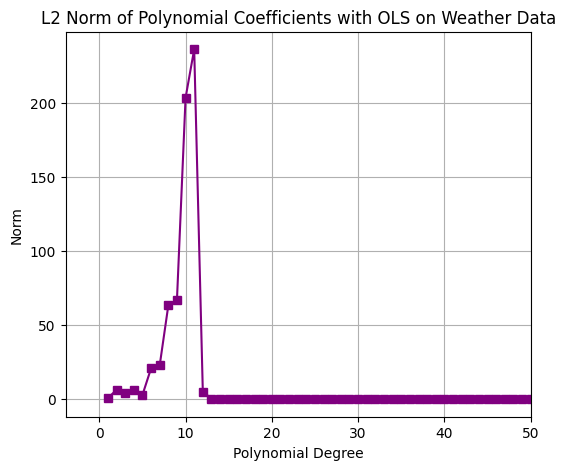

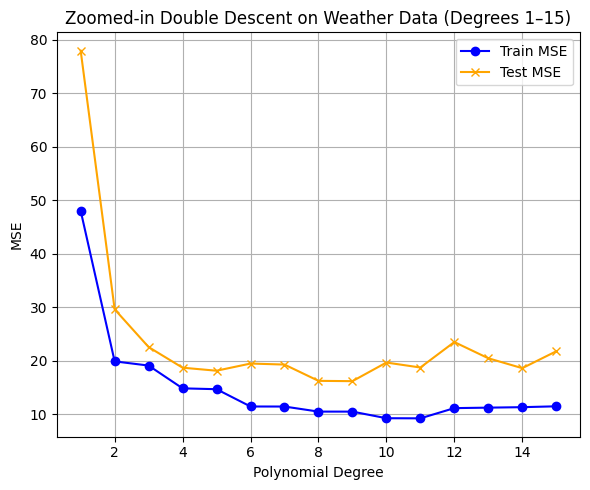

In [ ]:
# OLS Weather with corrected colors

# Plot double descent
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, marker='o', label='Train MSE', color = "blue")
plt.plot(degrees, test_errors, marker='x', label='Test MSE', color = "orange")
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title("Double Descent With Polynomial Regression and OLS on Weather Data")
plt.legend()
plt.grid(True)
plt.show()

# Plot norm of solution curves per number of parameters
plt.figure(figsize=(6, 5))
plt.plot(degrees, coef_norms, marker='s', color='purple')
plt.xlim(right = 50)
plt.xlabel('Polynomial Degree')
plt.ylabel('Norm')
plt.title('L2 Norm of Polynomial Coefficients with OLS on Weather Data')
plt.grid(True)
plt.show()

# Zoom PLot
zoom_degrees = degrees[:15]
zoom_train_errors = train_errors[:15]
zoom_test_errors = test_errors[:15]

plt.figure(figsize=(6, 5))
plt.plot(zoom_degrees, zoom_train_errors, marker='o', label='Train MSE', color = "blue")
plt.plot(zoom_degrees, zoom_test_errors, marker='x', label='Test MSE', color = "orange")
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('Zoomed-in Double Descent on Weather Data (Degrees 1–15)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Lasso

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.096e+02, tolerance: 2.287e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.003e+02, tolerance: 2.287e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.224e+02, tolerance: 2.287e

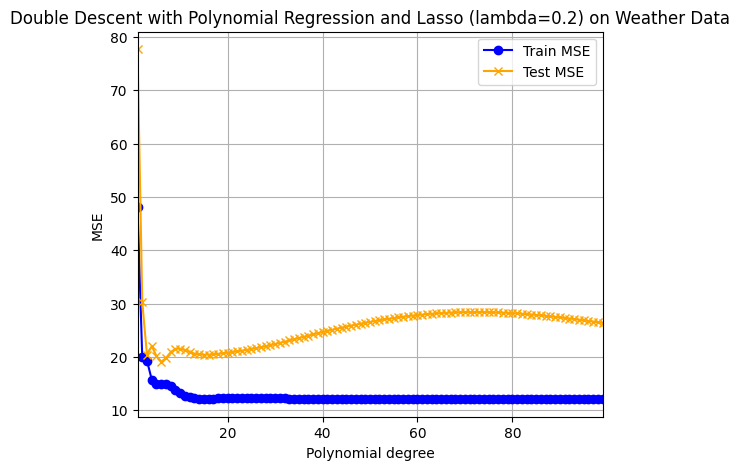

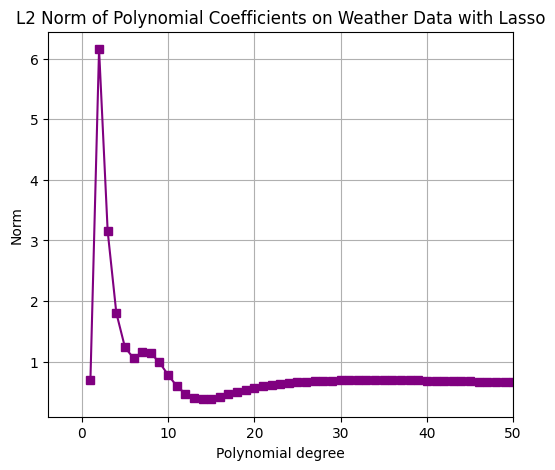

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

degrees = list(range(1, 100))  # under and overparameterized region for 50 data pts selected

train_errors_lasso = []
test_errors_lasso = []
coef_norms_lasso = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # make model with lambda=0.2 and max_iter in case convergence not reached with unruly coefficient vectors
    model = Lasso(alpha=0.2, max_iter=20000, tol=1e-4)
    model.fit(X_train_poly, Y_train.ravel())

    # make predictions and store mse
    Y_train_pred = model.predict(X_train_poly)
    Y_test_pred = model.predict(X_test_poly)

    train_errors_lasso.append(mean_squared_error(Y_train, Y_train_pred))
    test_errors_lasso.append(mean_squared_error(Y_test, Y_test_pred))

    # find norm of solution curves
    coef_norm = np.linalg.norm(model.coef_)
    coef_norms_lasso.append(coef_norm)

# Plot double descent
plt.figure(figsize=(6, 5))
plt.plot(degrees, train_errors_lasso, marker='o', label='Train MSE', color ="blue")
plt.plot(degrees, test_errors_lasso, marker='x', label='Test MSE', color = "orange")
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.title('Double Descent with Polynomial Regression and Lasso (lambda=0.2) on Weather Data')
plt.legend()
plt.grid(True)
plt.xlim(left=1, right=max(degrees))
plt.show()

# Plot norm of solution curves
plt.figure(figsize=(6, 5))
plt.plot(degrees, coef_norms_lasso, marker='s', color='purple')
plt.xlim(right = 50)
plt.xlabel('Polynomial degree')
plt.ylabel('Norm')
plt.title('L2 Norm of Polynomial Coefficients on Weather Data with Lasso')
plt.grid(True)
plt.show()


### Ridge

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.14776e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.76444e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.72978e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.96535e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

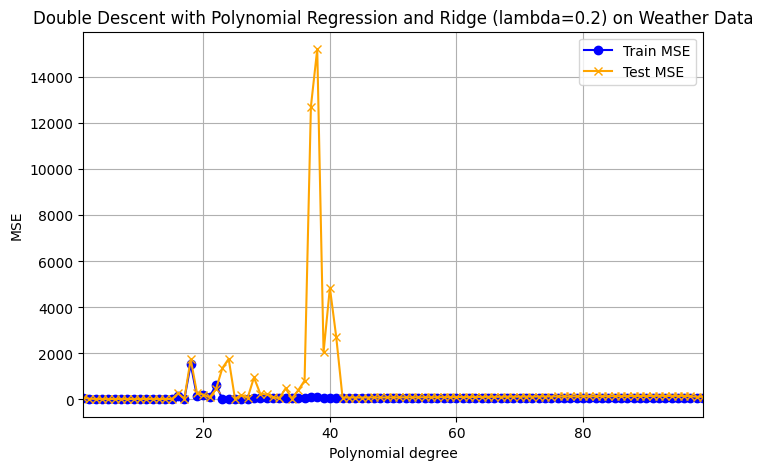

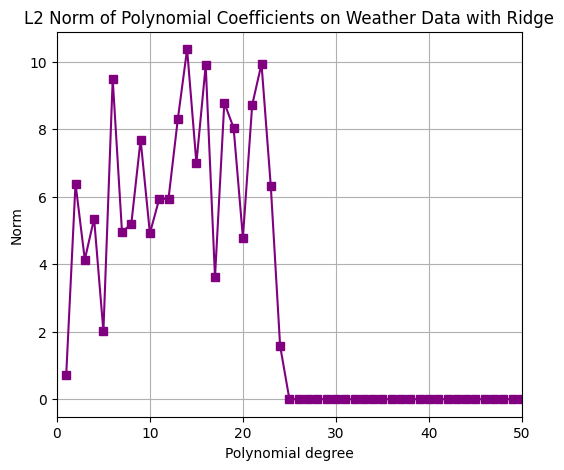

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

degrees = list(range(1, 100))  # under and overparameterized region for 50 data pts selected

train_errors_ridge = []
test_errors_ridge = []
coef_norms_ridge = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # make model with lambda=0.2 and max_iter in case convergence not reached with unruly coefficient vectors
    model = Ridge(alpha=0.2, max_iter=20000, tol=1e-4)
    model.fit(X_train_poly, Y_train.ravel())

    # make predictions and store mse
    Y_train_pred = model.predict(X_train_poly)
    Y_test_pred = model.predict(X_test_poly)

    train_errors_ridge.append(mean_squared_error(Y_train, Y_train_pred))
    test_errors_ridge.append(mean_squared_error(Y_test, Y_test_pred))

    # find norm of solution curves
    coef_norm = np.linalg.norm(model.coef_)
    coef_norms_ridge.append(coef_norm)

# Plot double descent
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors_ridge, marker='o', label='Train MSE', color = "blue")
plt.plot(degrees, test_errors_ridge, marker='x', label='Test MSE', color = "orange")
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.title('Double Descent with Polynomial Regression and Ridge (lambda=0.2) on Weather Data')
plt.legend()
plt.grid(True)
plt.xlim(left=1, right=max(degrees))
plt.show()

# Plot norm of solution curves
plt.figure(figsize=(6, 5))
plt.xlim(right = 50)
plt.plot(degrees, coef_norms_ridge, marker='s', color='purple')
plt.xlabel('Polynomial degree')
plt.ylabel('Norm')
plt.title('L2 Norm of Polynomial Coefficients on Weather Data with Ridge')
plt.grid(True)
plt.show()


## Plot Data

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.096e+02, tolerance: 2.287e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.003e+02, tolerance: 2.287e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.224e+02, tolerance: 2.287e

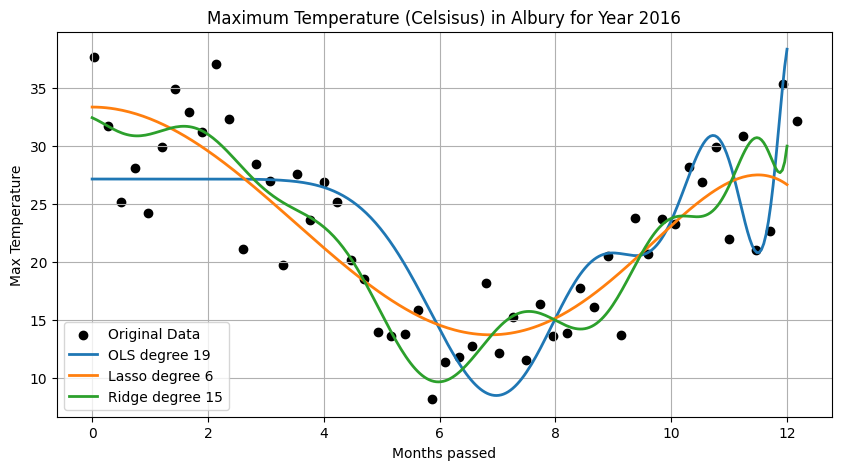

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

degrees = list(range(1, 100))  # under and overparameterized region for 50 data pts selected

def find_best_model(model_class, lambda_val=None, max_iter=10000, tol=1e-4):
    train_errors = []
    test_errors = []
    best_mse = float('inf')
    best_solution = None

    for d in degrees:
        # generate phi matrices
        poly = PolynomialFeatures(degree=d)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # generate model type
        if model_class in [Lasso, Ridge]:
            model = model_class(alpha=lambda_val, max_iter=max_iter, tol=tol)
        else:
            model = model_class()

        # fit model and find mse
        model.fit(X_train_poly, Y_train.ravel())
        Y_test_pred = model.predict(X_test_poly)
        mse = mean_squared_error(Y_test, Y_test_pred)

        # store mse values
        train_errors.append(mean_squared_error(Y_train, model.predict(X_train_poly)))
        test_errors.append(mse)

        # update best performing model if needed
        if mse < best_mse:
            best_mse = mse
            best_solution = {
                'degree': d,
                'intercept': model.intercept_,
                'coefficients': model.coef_,
                'poly': poly
            }

    return train_errors, test_errors, best_solution

# Find best models per loss fn

train_errors_ols, test_errors_ols, best_ols = find_best_model(LinearRegression)

train_errors_lasso, test_errors_lasso, best_lasso = find_best_model(Lasso, lambda_val=0.2, max_iter=20000, tol=1e-4)

train_errors_ridge, test_errors_ridge, best_ridge = find_best_model(Ridge, lambda_val=0.2, max_iter=20000, tol=1e-4)

best_solutions = {
    'ols': best_ols,
    'lasso': best_lasso,
    'ridge': best_ridge
}

def plot_solution_curve(best_solution, x_values):
    # generate phi matrix
    poly = best_solution['poly']
    x_poly = poly.transform(x_values.reshape(-1, 1))

    # calculate y values
    y_pred = best_solution['intercept'] + x_poly.dot(best_solution['coefficients'])

    return y_pred


x_values = np.linspace(0, 12, 300)  # cover range of months

# Approximate optimal solution curve per loss fn
y_ols = plot_solution_curve(best_solutions['ols'], x_values)
y_lasso = plot_solution_curve(best_solutions['lasso'], x_values)
y_ridge = plot_solution_curve(best_solutions['ridge'], x_values)

# Plot original data
plt.figure(figsize=(10,5))
plt.scatter(x, weather, color='black', label='Original Data')

# Plot solution curves
plt.plot(x_values, y_ols, label=f'OLS degree {best_ols["degree"]}', linewidth=2)
plt.plot(x_values, y_lasso, label=f'Lasso degree {best_lasso["degree"]}', linewidth=2)
plt.plot(x_values, y_ridge, label=f'Ridge degree {best_ridge["degree"]}', linewidth=2)

plt.xlabel('Months passed')
plt.ylabel('Max Temperature')
plt.title('Maximum Temperature (Celsisus) in Albury for Year 2016')
plt.legend()
plt.grid(True)
plt.show()


### Solution Curve Comparisons

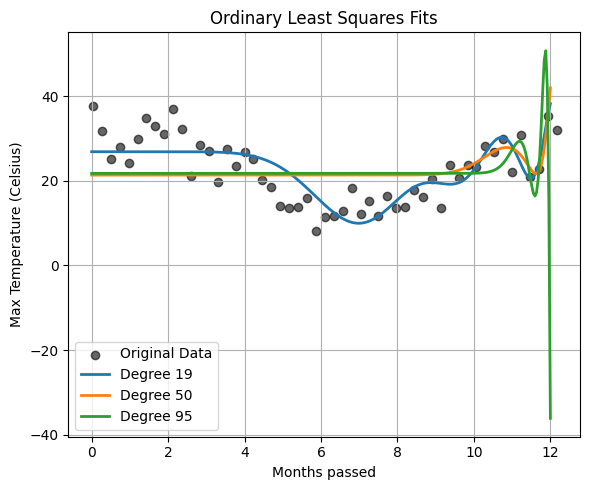

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.32924e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


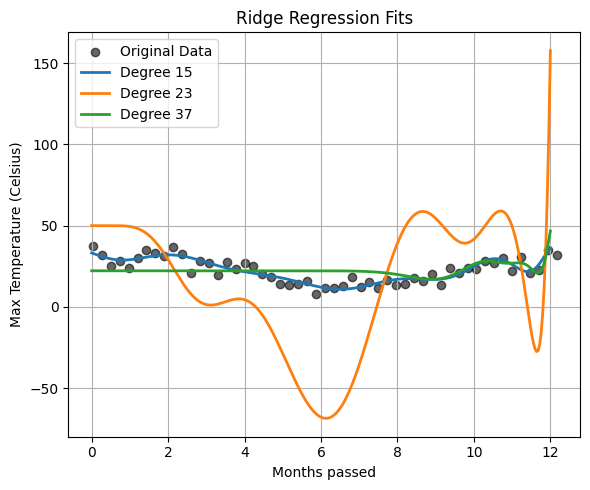

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.026e+02, tolerance: 3.071e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.509e+02, tolerance: 3.071e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.405e+02, tolerance: 3.071e

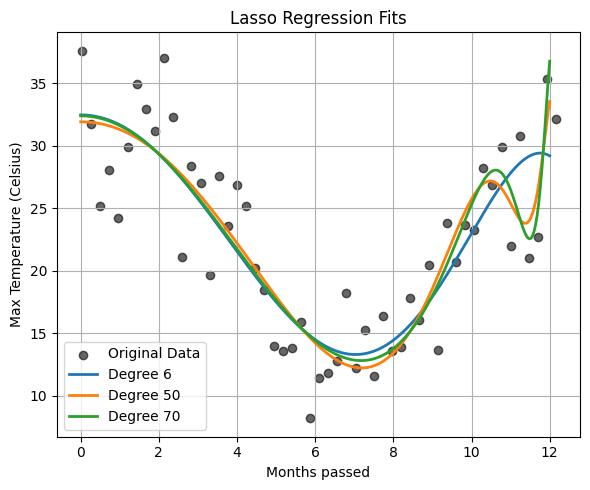

In [ ]:
def model_fits(x, y, x_values, degrees_dict,
                               lambda_lasso=0.2, lambda_ridge=0.2,
                               max_iter=20000, tol=1e-4):
    model_map = {
        'ols': LinearRegression,
        'ridge': Ridge,
        'lasso': Lasso
    }

    titles = {
        'ols': 'Ordinary Least Squares',
        'ridge': 'Ridge Regression',
        'lasso': 'Lasso Regression'
    }

    for key in ['ols', 'ridge', 'lasso']:
        # get model specs
        model_class = model_map[key]
        degrees = degrees_dict.get(key, [])
        lambda_val = {'ridge': lambda_ridge, 'lasso': lambda_lasso}.get(key, None)

        # plot original data
        plt.figure(figsize=(6, 5))
        plt.scatter(x, y, color='black', label='Original Data', alpha=0.6)

        for degree in degrees:
            # generate model
            poly = PolynomialFeatures(degree=degree)
            X_poly = poly.fit_transform(x)
            x_poly_plot = poly.transform(x_values.reshape(-1, 1))

            if key in ['ridge', 'lasso']:
                model = model_class(alpha=lambda_val, max_iter=max_iter, tol=tol)
            else:
                model = model_class()

            # fit model and plot output
            model.fit(X_poly, y.ravel())
            y_pred = model.predict(x_poly_plot)

            plt.plot(x_values, y_pred, label=f'Degree {degree}', linewidth=2)

        plt.title(f'{titles[key]} Fits')
        plt.xlabel('Months passed')
        plt.ylabel('Max Temperature (Celsius)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


x_values = np.linspace(0, 12, 300)  # cover range of months

# optimal degree fit, overparamterized degree, degrees near sharp spikes
degrees_dict = {
    'ols': [19, 50, 95],
    'ridge': [15, 23, 37],
    'lasso': [6, 50, 70]
}

model_fits(x, weather, x_values, degrees_dict,
                           lambda_lasso=0.2, lambda_ridge=0.2)
